# Ensembles Random Forest
A demonstration of the feature importance and OOB estimate of generalisation accuracy facilities in `scikit-learn` Random Forest.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statistics import mean

In [2]:
wine_pd = pd.read_csv('Wine.csv')
wine_pd.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Type1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Type1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Type1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Type1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Type1


Random forest uses decision trees so there is no need to normalise the data.

In [3]:
y = wine_pd.pop('class').values
X = wine_pd.values
X.shape

(178, 13)

The following code supresses all warnings. We shouldn't really do this  
but for the following experiment we start off training an RF with too few trees  
and this produces some warnings.

In [11]:
import warnings
warnings.filterwarnings("ignore")

### Generalisation Accuracy
Comparing the RF OOB generalisation accuracy estimates with that estimated using hold-out.  
The OOB estimate gets better as more ensemble members are used.  
Repeating 50 times. 

In [12]:
nreps = 50
nest_range =range(10,110,10)
oob_res_dict = {}
ho_res_dict ={}
for nest in nest_range:
    oob_accs = []
    ho_accs = []
    for r in range(nreps):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        RFoob = RandomForestClassifier(n_estimators = nest, oob_score = True)
        RFoob.fit(X_train,y_train)
        oob_est = RFoob.oob_score_
        oob_accs.append(oob_est)
        y_pred = RFoob.predict(X_test)
        ho_est = accuracy_score(y_pred,y_test)
        ho_accs.append(ho_est)
    print(mean(oob_accs), mean(ho_accs))
    oob_res_dict[nest]=mean(oob_accs)
    ho_res_dict[nest]=mean(ho_accs)

0.9174789915966387 0.9620338983050848
0.953781512605042 0.9728813559322034
0.9650420168067226 0.9769491525423729
0.9715966386554622 0.9820338983050848
0.9736134453781512 0.9830508474576272
0.9741176470588235 0.9796610169491525
0.9741176470588235 0.9803389830508474
0.9779831932773109 0.9742372881355932
0.9736134453781512 0.9847457627118644
0.9756302521008403 0.9779661016949153


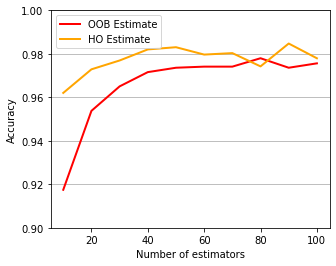

In [13]:
fig = plt.figure(figsize=(5,4))

plt.plot(nest_range, list(oob_res_dict.values()), lw = 2, color = 'r', 
         label = 'OOB Estimate')
plt.plot(nest_range, list(ho_res_dict.values()), lw = 2, color = 'orange', 
         label = 'HO Estimate')

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.ylim([0.9,1])
plt.legend(loc = 'upper left')
plt.grid(axis = 'y')
fig.savefig('OOB-acc.pdf')

### Feature Importance
Generating RF feature importance scores for the wine dataset. 

In [14]:
wine_pd.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [15]:
RFoob = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state=0)
RFoob.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=0)

In [16]:
RFoob.feature_importances_

array([0.10646078, 0.0468553 , 0.01257686, 0.03346163, 0.03203226,
       0.05213924, 0.16869489, 0.01242757, 0.01879409, 0.12613819,
       0.09790017, 0.10175914, 0.19075988])

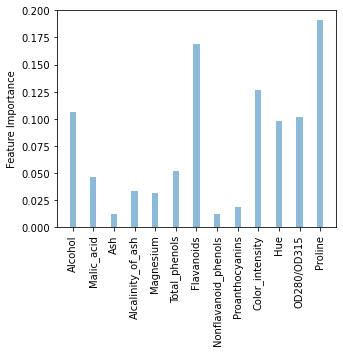

In [17]:
names = list(wine_pd.columns)
names[11] = 'OD280/OD315'
y_pos = np.arange(len(names))
f = plt.figure(figsize=(5,4))
plt.bar(y_pos, RFoob.feature_importances_, align='center', width = 0.3, alpha=0.5, 
        label = "Feature")
plt.xticks(y_pos, names, rotation=90)
plt.ylabel('Feature Importance')
f.savefig('RF-FI.pdf',bbox_inches='tight')